In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os

data_type = 'float32'

import cell2location

import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

Global seed set to 0


In [2]:
results_folder = '/home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map/N2_alpha200_cellxgene_filtered_genesets'

In [3]:
adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)

In [4]:
adata_vis.obs

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,_indices,_scvi_batch,_scvi_labels
spot_id,,,,,,,,,,,,,,,,
1149G_A1_096_AACACTTGGCAAGGAA-1,1,47,71,1149G_A1_096,24,3.218876,42.0,3.761200,100.000000,100.000000,100.000000,100.000000,0.0,0,0,0
1149G_A1_096_AACAGGATTCATAGTT-1,1,49,43,1149G_A1_096,29,3.401197,32.0,3.496508,100.000000,100.000000,100.000000,100.000000,0.0,1,0,0
1149G_A1_096_AACAGGTTATTGCACC-1,1,28,86,1149G_A1_096,293,5.683580,411.0,6.021023,33.333333,53.041363,77.372263,100.000000,0.0,2,0,0
1149G_A1_096_AACAGGTTCACCGAAG-1,1,51,41,1149G_A1_096,16,2.833213,20.0,3.044523,100.000000,100.000000,100.000000,100.000000,0.0,3,0,0
1149G_A1_096_AACATACTCATATGCG-1,1,50,6,1149G_A1_096,78,4.369448,96.0,4.574711,70.833333,100.000000,100.000000,100.000000,0.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080B_D1_327_TGTTCTGCTCTGTCGT-1,1,39,39,1080B_D1_327,120,4.795791,132.0,4.890349,46.969697,84.848485,100.000000,100.000000,0.0,12377,3,0
1080B_D1_327_TGTTGCGTCCAAGATT-1,1,51,65,1080B_D1_327,675,6.516193,855.0,6.752270,21.520468,32.748538,44.444444,79.532164,0.0,12378,3,0
1080B_D1_327_TGTTGGAACCTTCCGC-1,1,35,35,1080B_D1_327,180,5.198497,203.0,5.318120,35.960591,60.591133,100.000000,100.000000,0.0,12379,3,0


In [26]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

In [27]:
from cell2location.utils import select_slide
slide1 = select_slide(adata_vis, '1149G_A1_096') 
slide2 = select_slide(adata_vis, '1572G_D1_096') 
slide3 = select_slide(adata_vis, '1080T_A1_327') 
slide4 = select_slide(adata_vis, '1080B_D1_327') 

In [8]:
slide1.obs.sort_values(by=['array_row'], inplace=False)

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,_indices,_scvi_batch,_scvi_labels
spot_id,,,,,,,,,,,,,,,,
1149G_A1_096_GAGGTGCGGCTGACCA-1,1,10,54,1149G_A1_096,28,3.367296,35.0,3.583519,100.000000,100.0,100.0,100.0,0.0,1177,0,0
1149G_A1_096_AATGGTCGATACTCGG-1,1,10,52,1149G_A1_096,70,4.262680,97.0,4.584968,79.381443,100.0,100.0,100.0,0.0,111,0,0
1149G_A1_096_GCAAGCTTATTGACGT-1,1,10,74,1149G_A1_096,13,2.639057,16.0,2.833213,100.000000,100.0,100.0,100.0,0.0,1230,0,0
1149G_A1_096_ACTATTGCGAGCTAGA-1,1,10,62,1149G_A1_096,65,4.189655,83.0,4.430817,81.927711,100.0,100.0,100.0,0.0,213,0,0
1149G_A1_096_TCGCGGTAGTATGATC-1,1,10,64,1149G_A1_096,52,3.970292,65.0,4.189655,96.923077,100.0,100.0,100.0,0.0,1926,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149G_A1_096_CCGAAGCCAGGTTCAG-1,1,72,66,1149G_A1_096,12,2.564949,14.0,2.708050,100.000000,100.0,100.0,100.0,0.0,703,0,0
1149G_A1_096_ATTAGATTCGTACTCA-1,1,72,72,1149G_A1_096,16,2.833213,19.0,2.995732,100.000000,100.0,100.0,100.0,0.0,489,0,0
1149G_A1_096_AATGAAGAGGATGTAT-1,1,72,76,1149G_A1_096,7,2.079442,9.0,2.302585,100.000000,100.0,100.0,100.0,0.0,104,0,0


In [9]:
slide2.obs.sort_values(by=['array_row'], inplace=False)

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,_indices,_scvi_batch,_scvi_labels
spot_id,,,,,,,,,,,,,,,,
1572G_D1_096_TAGGAGCCAGACTCAG-1,1,3,45,1572G_D1_096,772,6.650279,854.0,6.751101,12.997658,21.311475,33.021077,68.149883,0.0,4823,1,0
1572G_D1_096_TGAATATGAGCCGGTG-1,1,3,47,1572G_D1_096,684,6.529419,756.0,6.629363,16.137566,22.751323,35.978836,75.661376,0.0,5233,1,0
1572G_D1_096_AAGTCTTAATAGAACT-1,1,4,50,1572G_D1_096,698,6.549651,797.0,6.682108,17.440402,24.968632,37.515684,75.156838,0.0,2289,1,0
1572G_D1_096_TAGTGACCAGTTGCGG-1,1,4,36,1572G_D1_096,659,6.492240,725.0,6.587550,15.586207,22.896552,36.689655,78.068966,0.0,4843,1,0
1572G_D1_096_GCTCGGACCTTCAAGT-1,1,4,40,1572G_D1_096,753,6.625392,836.0,6.729824,14.114833,21.889952,33.851675,69.736842,0.0,4180,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572G_D1_096_AGACTGGAACCGTTGG-1,1,77,65,1572G_D1_096,309,5.736572,349.0,5.857933,25.787966,40.114613,68.767908,100.000000,0.0,2572,1,0
1572G_D1_096_TACACGAACAGCTACT-1,1,77,59,1572G_D1_096,165,5.111988,173.0,5.159055,33.526012,62.427746,100.000000,100.000000,0.0,4728,1,0
1572G_D1_096_TCAATCAGATGACGTG-1,1,77,33,1572G_D1_096,503,6.222576,578.0,6.361302,21.626298,30.276817,47.577855,99.480969,0.0,4943,1,0


In [10]:
slide3.obs.sort_values(by=['array_row'], inplace=False)

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,_indices,_scvi_batch,_scvi_labels
spot_id,,,,,,,,,,,,,,,,
1080T_A1_327_GTACTTCCATCTGGCA-1,1,0,56,1080T_A1_327,203,5.318120,211.0,5.356586,27.488152,51.184834,98.578199,100.000000,0.0,8308,2,0
1080T_A1_327_TCTGCAGTAGTTATGA-1,1,0,66,1080T_A1_327,162,5.093750,169.0,5.135798,33.727811,63.313609,100.000000,100.000000,0.0,9288,2,0
1080T_A1_327_GGTGCGTGGAGTTGGT-1,1,0,72,1080T_A1_327,641,6.464588,777.0,6.656726,19.305019,30.373230,43.243243,81.853282,0.0,8231,2,0
1080T_A1_327_CTGTGCAACATTGAGG-1,1,0,74,1080T_A1_327,167,5.123964,174.0,5.164786,32.758621,61.494253,100.000000,100.000000,0.0,7504,2,0
1080T_A1_327_TGGCGACACTCGCATC-1,1,0,70,1080T_A1_327,134,4.905275,140.0,4.948760,40.000000,75.714286,100.000000,100.000000,0.0,9556,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080T_A1_327_GTCAACTCAACTGTTA-1,1,77,89,1080T_A1_327,395,5.981414,510.0,6.236370,32.352941,42.156863,61.764706,100.000000,0.0,8381,2,0
1080T_A1_327_ATCCGAACAGGCTCGA-1,1,77,87,1080T_A1_327,362,5.894403,455.0,6.122493,31.428571,42.417582,64.395604,100.000000,0.0,6280,2,0
1080T_A1_327_TCCGACCGCAAGTCCT-1,1,77,119,1080T_A1_327,2406,7.786136,4267.0,8.358901,17.459573,24.044996,32.950551,49.917975,0.0,9111,2,0


In [19]:
slide4.obs.sort_values(by=['array_row', 'array_col'], inplace=False).head(50)

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,_indices,_scvi_batch,_scvi_labels
spot_id,,,,,,,,,,,,,,,,
1080B_D1_327_CGCCTTAGCGGCCTCC-1,1,14,98,1080B_D1_327,1218,7.105786,1838.0,7.516977,20.239391,29.379761,40.859630,60.935800,0.0,10726,3,0
1080B_D1_327_ATGAGCTACATGGAAG-1,1,15,83,1080B_D1_327,548,6.308098,711.0,6.568078,25.738397,36.990155,51.054852,93.248945,0.0,10244,3,0
1080B_D1_327_TCAACAGGCCATGCCG-1,1,15,91,1080B_D1_327,729,6.593045,998.0,6.906755,24.448898,34.468938,46.993988,77.054108,0.0,11939,3,0
1080B_D1_327_GCGTCCTCTGCCGTTG-1,1,15,93,1080B_D1_327,625,6.439350,831.0,6.723833,24.789410,36.823105,48.856799,84.957882,0.0,11310,3,0
1080B_D1_327_CCGCAGTGATCACTGT-1,1,15,95,1080B_D1_327,611,6.416732,746.0,6.616065,20.107239,31.501340,44.906166,85.120643,0.0,10564,3,0
1080B_D1_327_AGCGACCGTTCTATAC-1,1,15,97,1080B_D1_327,1445,7.276556,2214.0,7.703008,19.873532,27.868112,38.211382,57.317073,0.0,10034,3,0
1080B_D1_327_GTTAGGCCTGAACATC-1,1,15,99,1080B_D1_327,1229,7.114769,1751.0,7.468513,19.988578,28.098230,39.520274,58.366648,0.0,11677,3,0
1080B_D1_327_AGACGCTTGGCCTCAC-1,1,15,101,1080B_D1_327,1359,7.215240,2048.0,7.625107,19.531250,27.343750,38.085938,58.056641,0.0,9993,3,0
1080B_D1_327_ATGAATGTATCGTGGT-1,1,15,103,1080B_D1_327,3470,8.152198,8313.0,9.025696,19.150728,26.248045,35.053531,50.066161,0.0,10240,3,0


[<AxesSubplot: title={'center': 'Adipocytes'}, xlabel='spatial1', ylabel='spatial2'>]

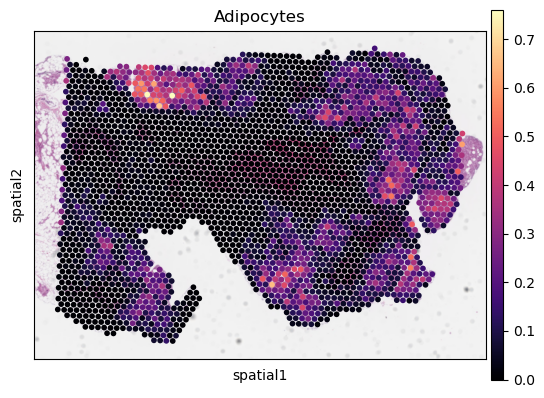

In [34]:
sc.pl.spatial(slide4, cmap='magma', color='Adipocytes',
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, show = False
                 )